In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
import datetime
import matplotlib.dates as mdates
%matplotlib inline
import pickle

Update end date below to the previous day's date

In [2]:
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%m/%d/%Y')

'01/04/2022'

In [3]:
x = pd.date_range(start='3/25/2020', end=yesterday)
date_list = []
for date_value in x.strftime('%m-%d-%Y'):
    date_list.append(date_value)
dt_date_list = pd.to_datetime(pd.Series(date_list))

https://github.com/CSSEGISandData/COVID-19

In [4]:
df_jhu_total_dict= {}
for y in range(len(date_list)):
    !sleep 3
    url_value = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + date_list[y] + r'.csv'
    df_jhu_total_dict[date_list[y]] = pd.read_csv(url_value,header=0)
    df_jhu_total_dict[date_list[y]]['dt_date'] = dt_date_list[y]
    print(date_list[y])

03-25-2020
03-26-2020
03-27-2020
03-28-2020
03-29-2020
03-30-2020
03-31-2020
04-01-2020
04-02-2020
04-03-2020
04-04-2020
04-05-2020
04-06-2020
04-07-2020
04-08-2020
04-09-2020
04-10-2020
04-11-2020
04-12-2020
04-13-2020
04-14-2020
04-15-2020
04-16-2020
04-17-2020
04-18-2020
04-19-2020
04-20-2020
04-21-2020
04-22-2020
04-23-2020
04-24-2020
04-25-2020
04-26-2020
04-27-2020
04-28-2020
04-29-2020
04-30-2020
05-01-2020
05-02-2020
05-03-2020
05-04-2020
05-05-2020
05-06-2020
05-07-2020
05-08-2020
05-09-2020
05-10-2020
05-11-2020
05-12-2020
05-13-2020
05-14-2020
05-15-2020
05-16-2020
05-17-2020
05-18-2020
05-19-2020
05-20-2020
05-21-2020
05-22-2020
05-23-2020
05-24-2020
05-25-2020
05-26-2020
05-27-2020
05-28-2020
05-29-2020
05-30-2020
05-31-2020
06-01-2020
06-02-2020
06-03-2020
06-04-2020
06-05-2020
06-06-2020
06-07-2020
06-08-2020
06-09-2020
06-10-2020
06-11-2020
06-12-2020
06-13-2020
06-14-2020
06-15-2020
06-16-2020
06-17-2020
06-18-2020
06-19-2020
06-20-2020
06-21-2020
06-22-2020
06-23-2020

In [5]:
with open(yesterday.strftime('%d_%b_%Y') + r'_JHU_total_data.pkl', 'wb') as ofile:
    pickle.dump(df_jhu_total_dict, ofile)

In [6]:
!ls -alt *.pkl


-rw-r--r-- 1 ldhagen ldhagen 323515524 Jan  5 14:14 04_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 322999222 Jan  4 13:27 03_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 322482920 Jan  3 12:49 02_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 321966618 Jan  2 15:25 01_Jan_2022_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 320934031 Dec 31 14:45 30_Dec_2021_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen   6109608 Dec 30 17:15 29_Dec_2021_JHU_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 320417746 Dec 30 15:55 29_Dec_2021_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 319869359 Dec 29 14:42 28_Dec_2021_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 319385176 Dec 28 13:28 27_Dec_2021_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 320650145 Dec 27 14:34 26_Dec_2021_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 320166007 Dec 26 18:29 25_Dec_2021_JHU_total_data.pkl
-rw-r--r-- 1 ldhagen ldhagen 320166007 Dec 26 18:28 25_Dec_2021_JHU_data.pkl
-rw-r--r-- 1 ldh

with open('29_Dec_2021_JHU_total_data.pkl', 'rb') as ifile:
    df_jhu_total_dict = pickle.load(ifile)

In [7]:
len(df_jhu_total_dict)

651

df_jhu_additional_dict = {}
url_value = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/12-28-2021.csv'
df_jhu_additional_dict['12-28-2021'] = pd.read_csv(url_value,header=0)

df_jhu_additional_dict

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
total_key_list = list(df_jhu_total_dict.keys())
part_key_list = total_key_list[300::]

In [10]:
def process_combined_key_confirmed(passed_dict, passed_keys, passed_combined_key):
    print(passed_combined_key)
    aaa = pd.DataFrame()
#    aaa = passed_dict[passed_keys[0]].loc[passed_dict[passed_keys[0]].Combined_Key == passed_combined_key]
#    print(aaa)
    for d_value in passed_keys:
        aaa = aaa.append(passed_dict[d_value].loc[passed_dict[d_value].Combined_Key == passed_combined_key])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Confirmed']]
    ccc = bbb.set_index('dt_date')
    ddd = ccc.diff(periods = 1)
    ddd_7day_moving = ddd.rolling(7).mean().shift()
    return(ddd,passed_combined_key,ddd_7day_moving)

comkey = 'Bexar, Texas, US'
aaa = df_jhu_total_dict[date_list[-10]].loc[df_jhu_total_dict[date_list[-10]].Combined_Key == comkey]

In [11]:
def chart_daily_confirmed(passed_df, passed_combined_key, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_combined_key + '*** Daily COVID Cases')
    plt.xlabel('Date',color='black')
    plt.ylabel('New COVID Cases',color='black')
    plt.bar(passed_df.index,passed_df.Confirmed)
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Active Cases'])
    fig.savefig('JHUDaily '+ passed_combined_key + ' New.png')
plt.close()

In [12]:
def process_combined_key_deaths(passed_dict, passed_keys, passed_combined_key):
    print(passed_combined_key)
    aaa = pd.DataFrame()
#    aaa = passed_dict[passed_keys[0]].loc[passed_dict[passed_keys[0]].Combined_Key == passed_combined_key]
#    print(aaa)
    for d_value in passed_keys:
        aaa = aaa.append(passed_dict[d_value].loc[passed_dict[d_value].Combined_Key == passed_combined_key])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Deaths']]
    ccc = bbb.set_index('dt_date')
    ddd = ccc.diff(periods = 1)
    ddd_7day_moving = ddd.rolling(7).mean().shift()
    return(ddd,passed_combined_key,ddd_7day_moving)

In [13]:
def chart_daily_deaths(passed_df, passed_combined_key, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_combined_key + '*** Daily COVID Deaths')
    plt.xlabel('Date',color='black')
    plt.ylabel('New COVID Deaths',color='black')
    plt.bar(passed_df.index,passed_df.Deaths)
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Deaths'])
    fig.savefig('JHUDaily '+ passed_combined_key + ' New.png')
plt.close()

In [ ]:
for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Texas, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

Bexar, Texas, US
Bexar, Texas, US
Dallas, Texas, US
Dallas, Texas, US
Harris, Texas, US
Harris, Texas, US
Travis, Texas, US
Travis, Texas, US


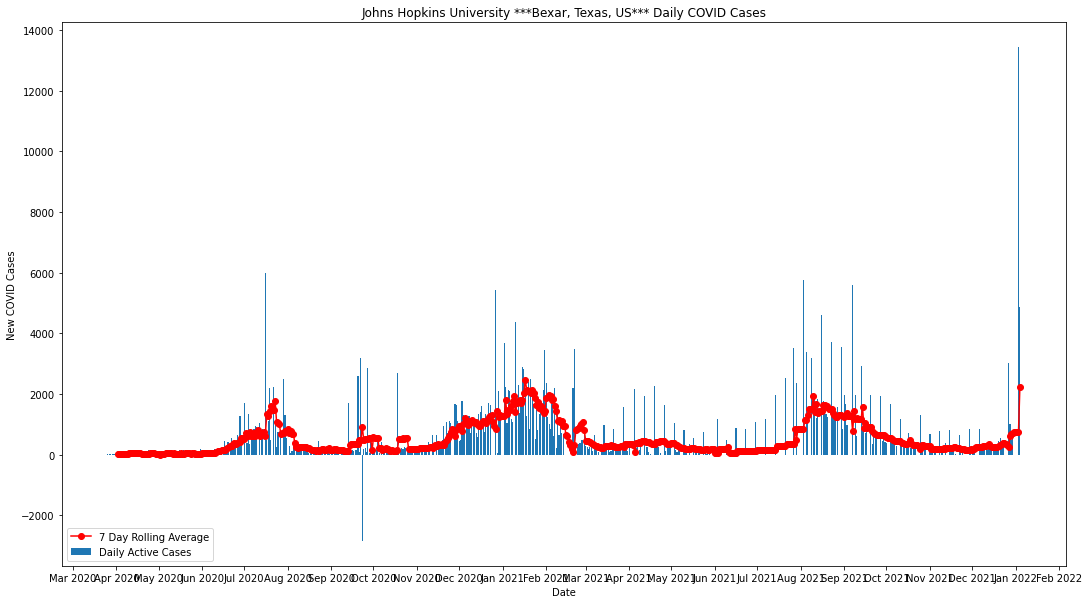

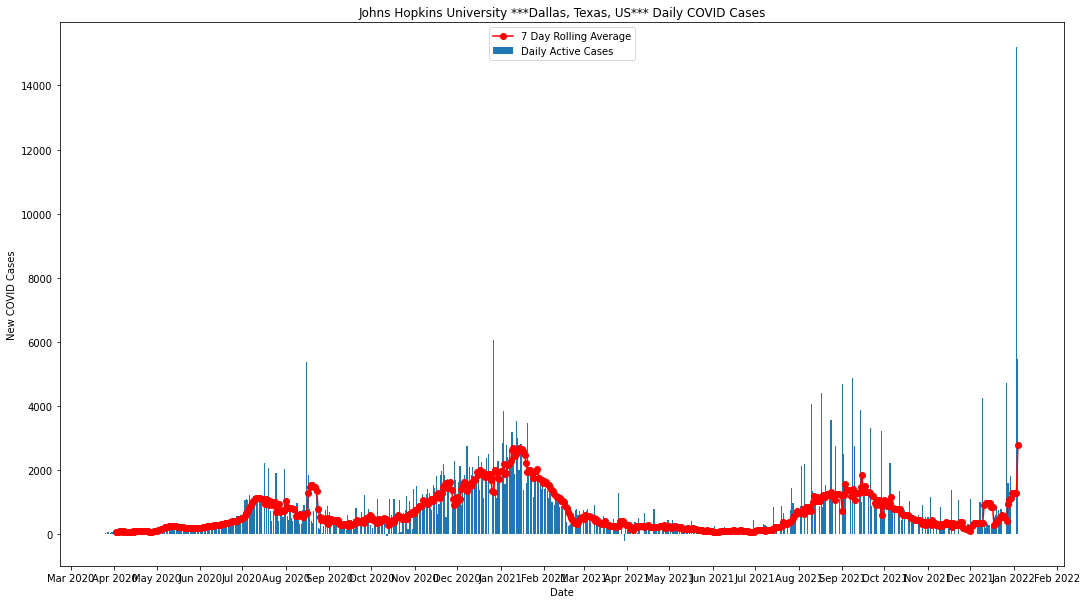

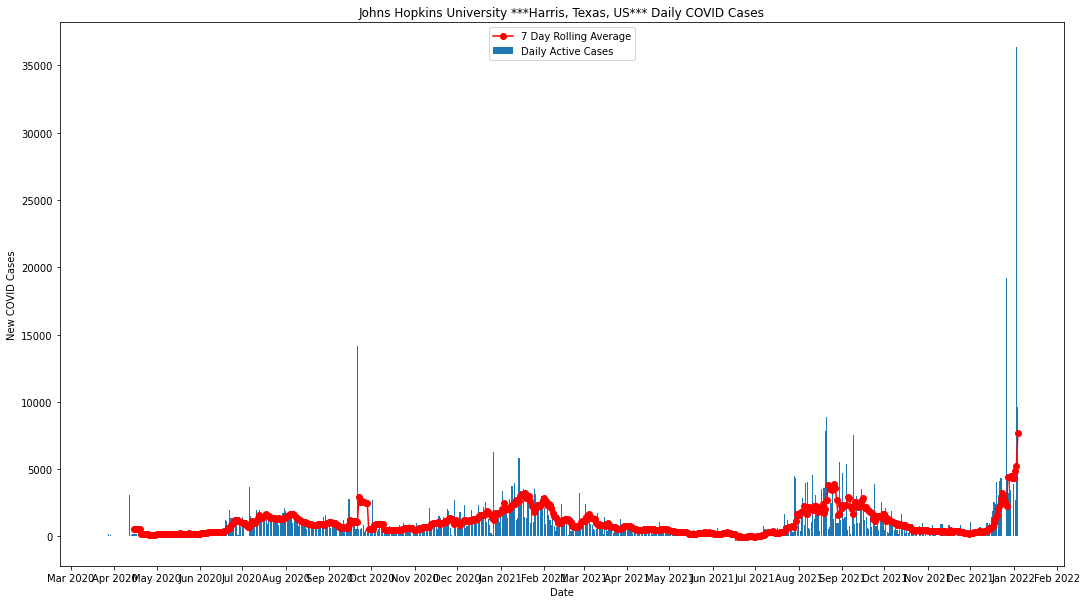

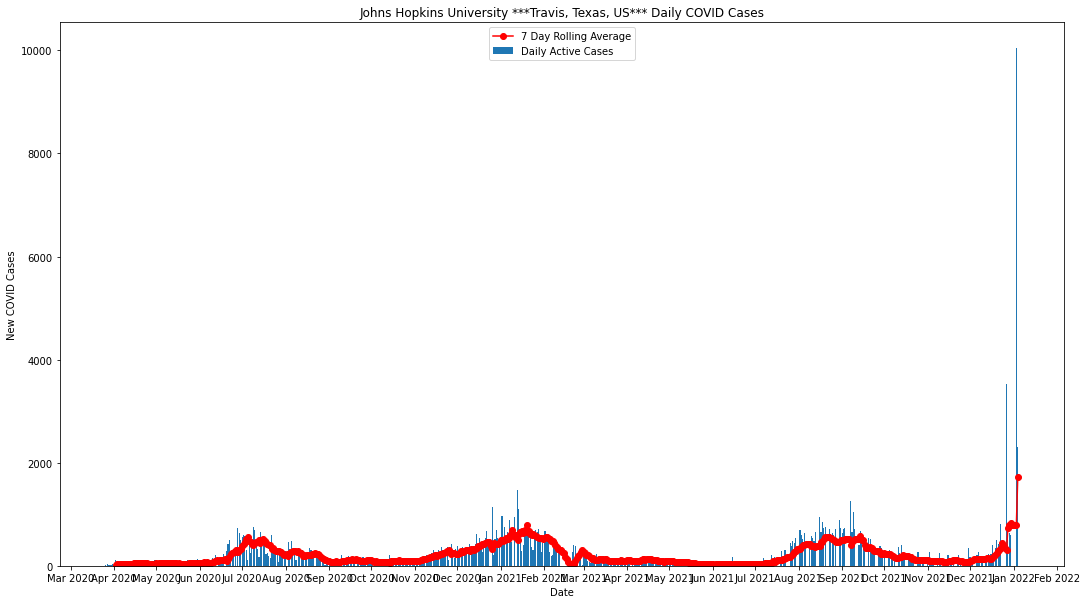

In [14]:
shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

In [ ]:
for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' New York, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

In [15]:
short_dict = {}
short_keys = date_list[-400:] 
for x in short_keys:
    short_dict[x] = df_jhu_total_dict[x]

In [ ]:
for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' New York, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(short_dict, short_keys, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

Bronx, New York, US
Bronx, New York, US
Kings, New York, US
Kings, New York, US
New York, New York, US
New York, New York, US
Queens, New York, US
Queens, New York, US
Richmond, New York, US
Richmond, New York, US


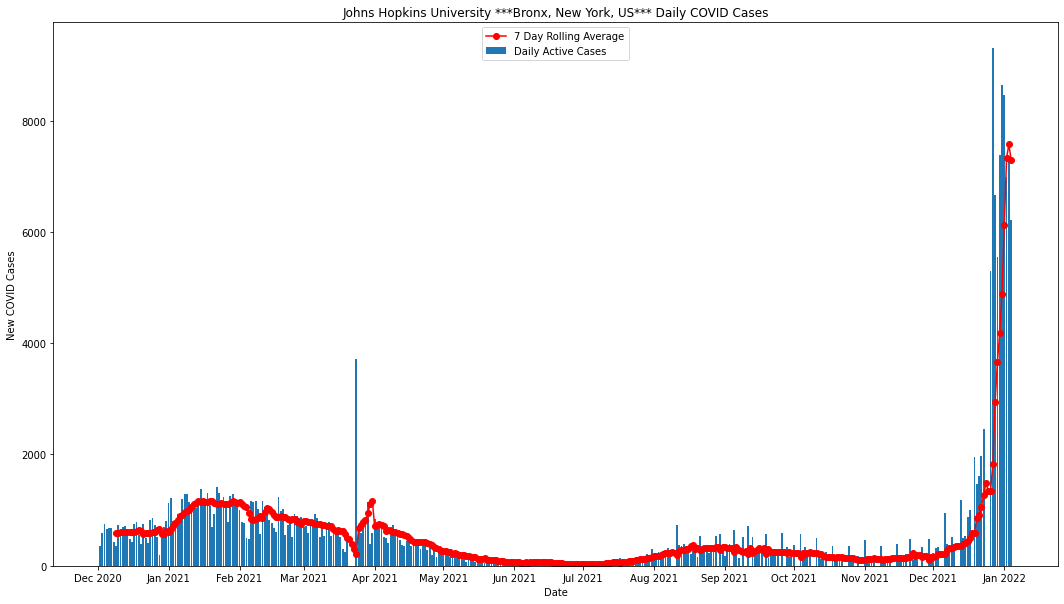

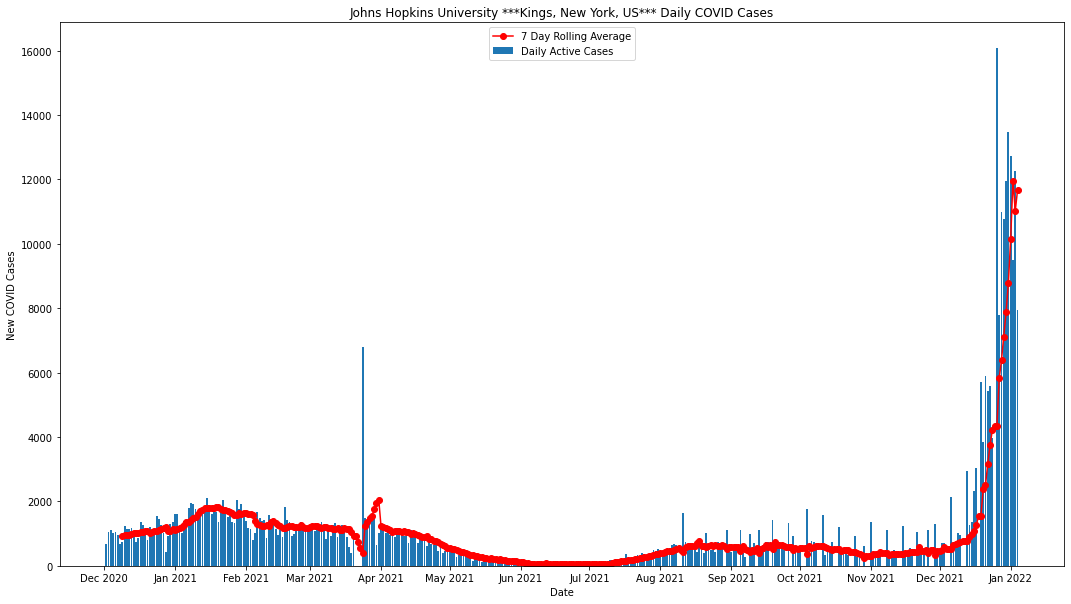

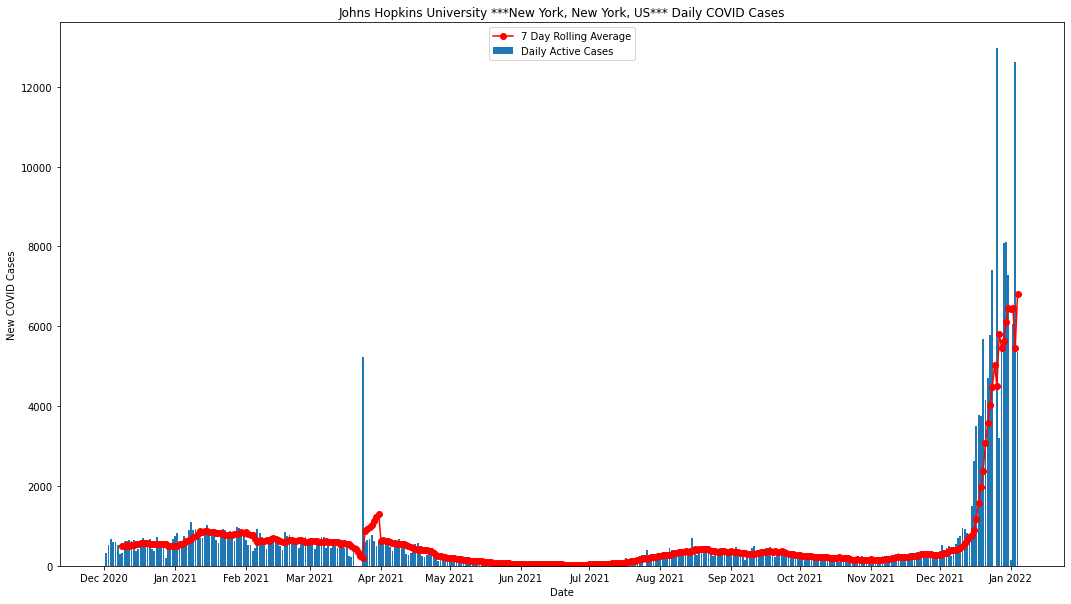

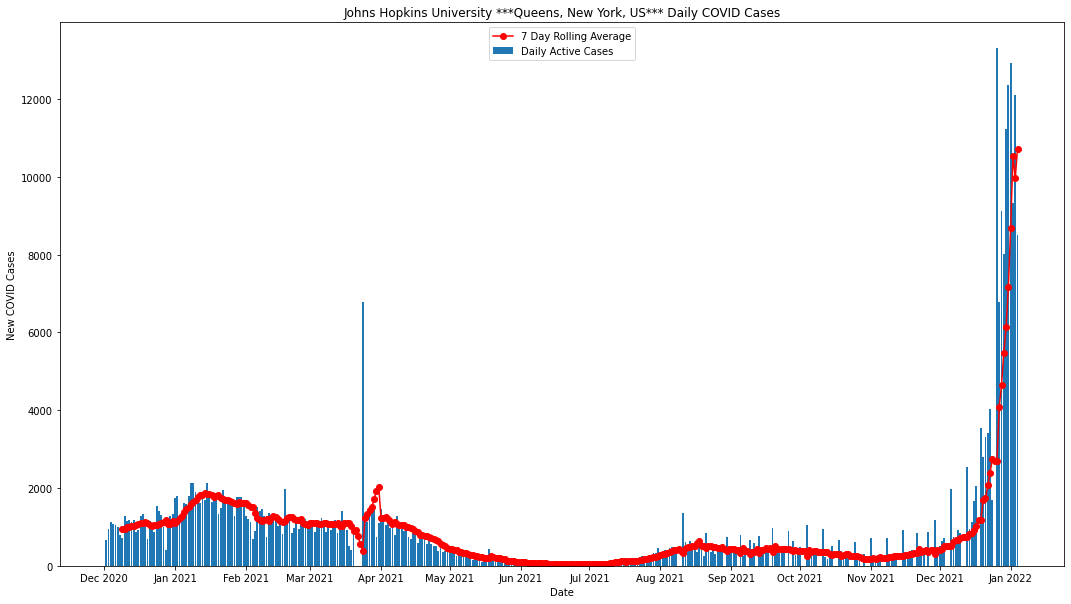

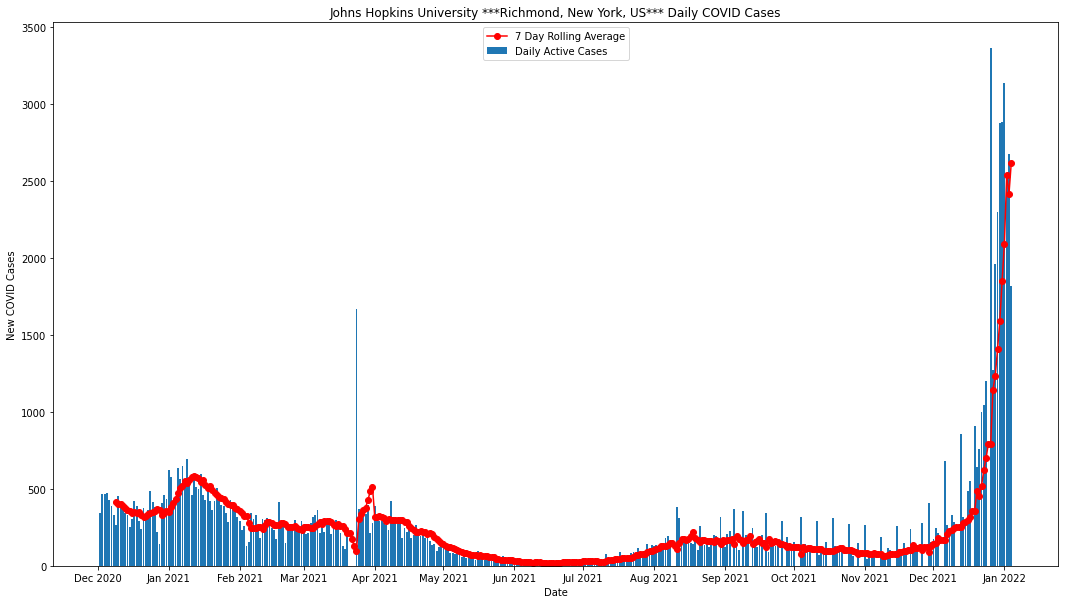

In [16]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_confirmed(short_dict, short_keys, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])
    

In [ ]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

In [ ]:
for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Florida, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

In [ ]:
for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Florida, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

In [ ]:
for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' California, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_confirmed(df_jhu_total_dict, date_list, comkey)
    chart_daily_confirmed(xxx[0], xxx[1], xxx[2])

Bronx, New York, US
Bronx, New York, US
Kings, New York, US
Kings, New York, US
New York, New York, US
New York, New York, US
Queens, New York, US
Queens, New York, US
Richmond, New York, US
Richmond, New York, US


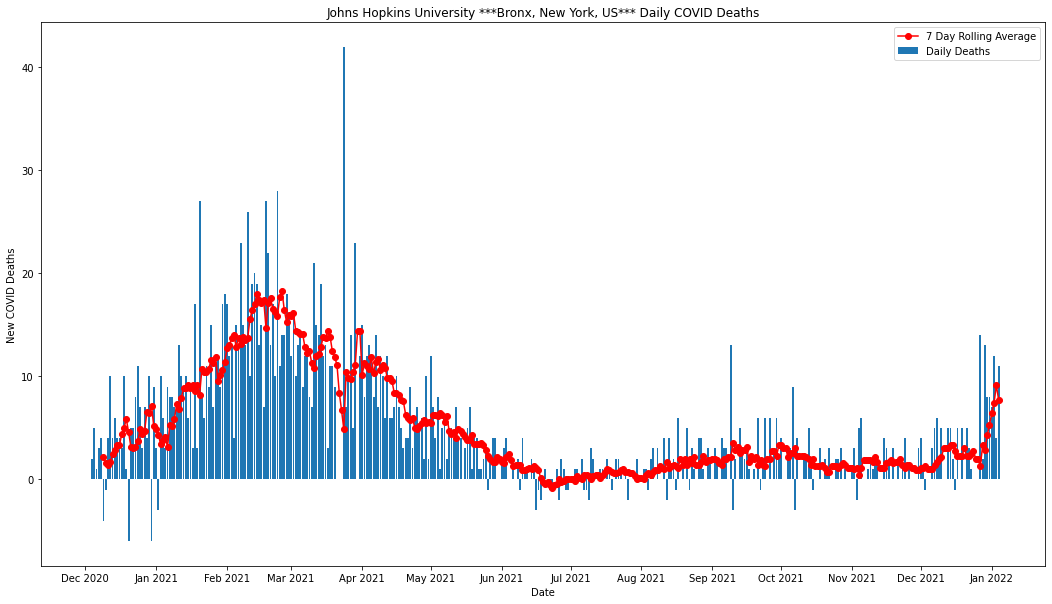

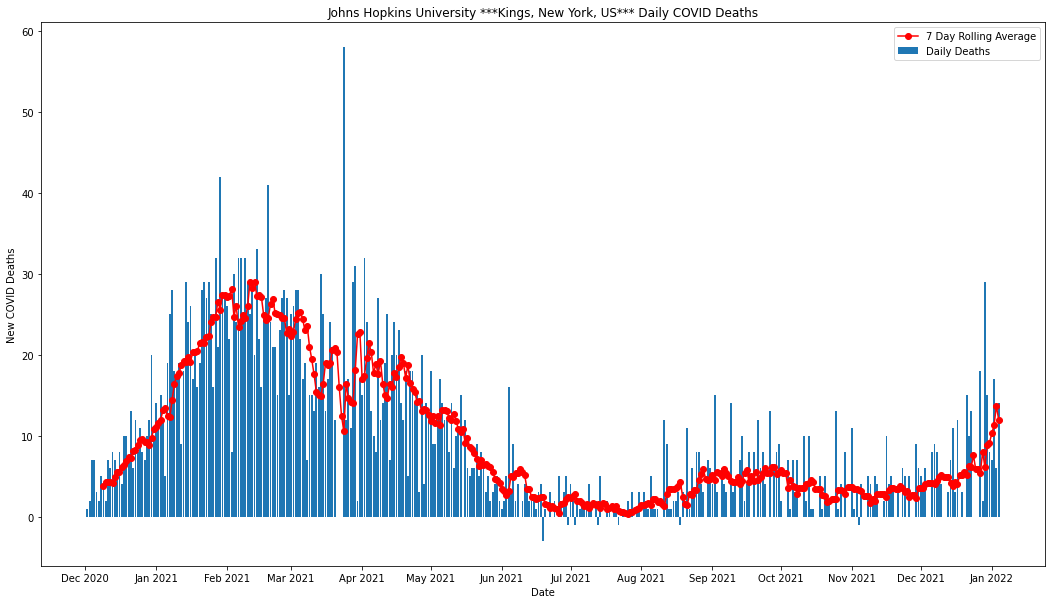

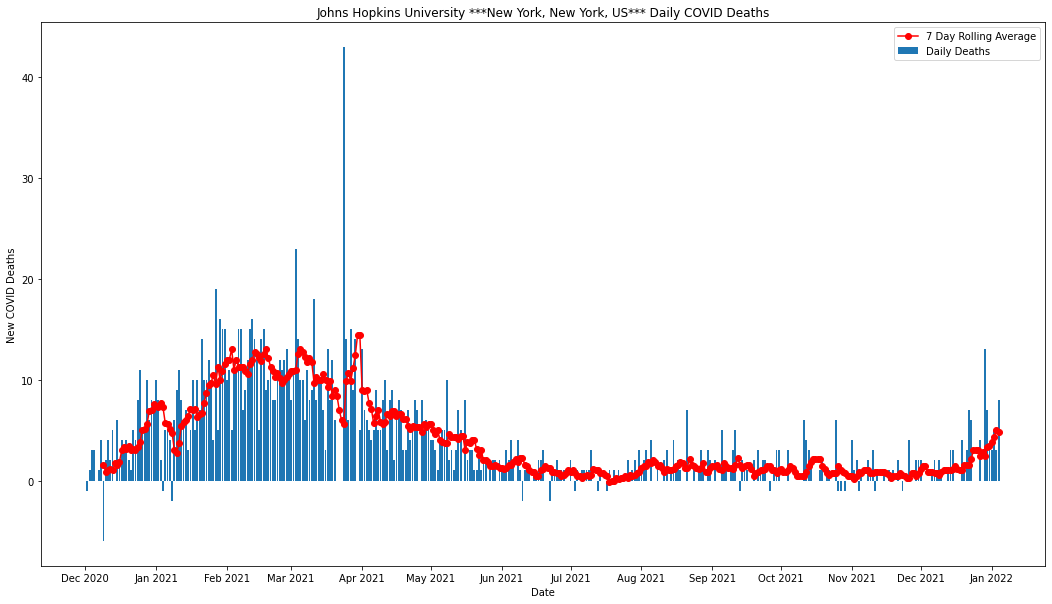

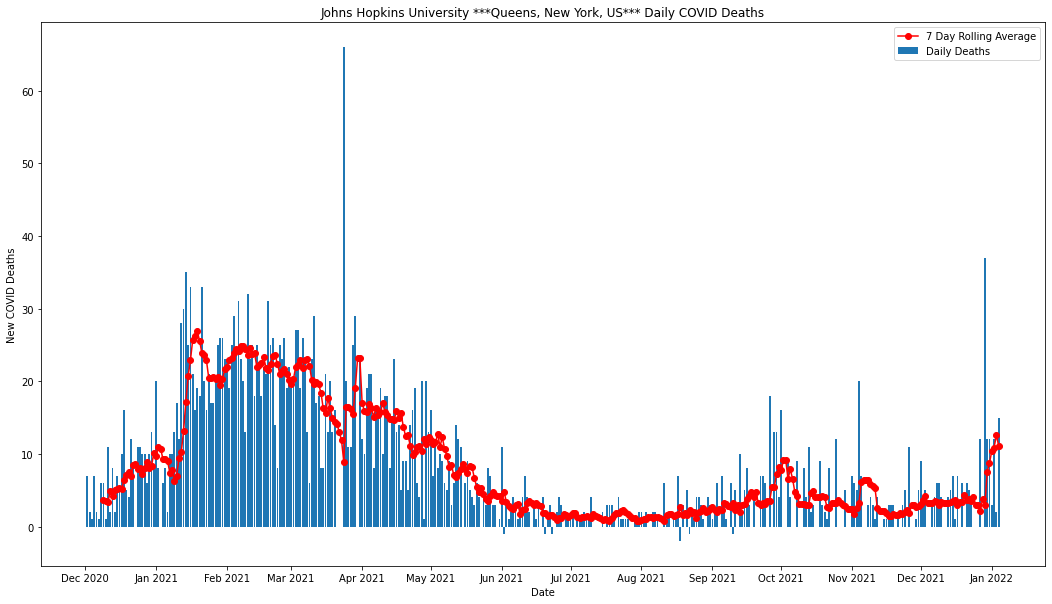

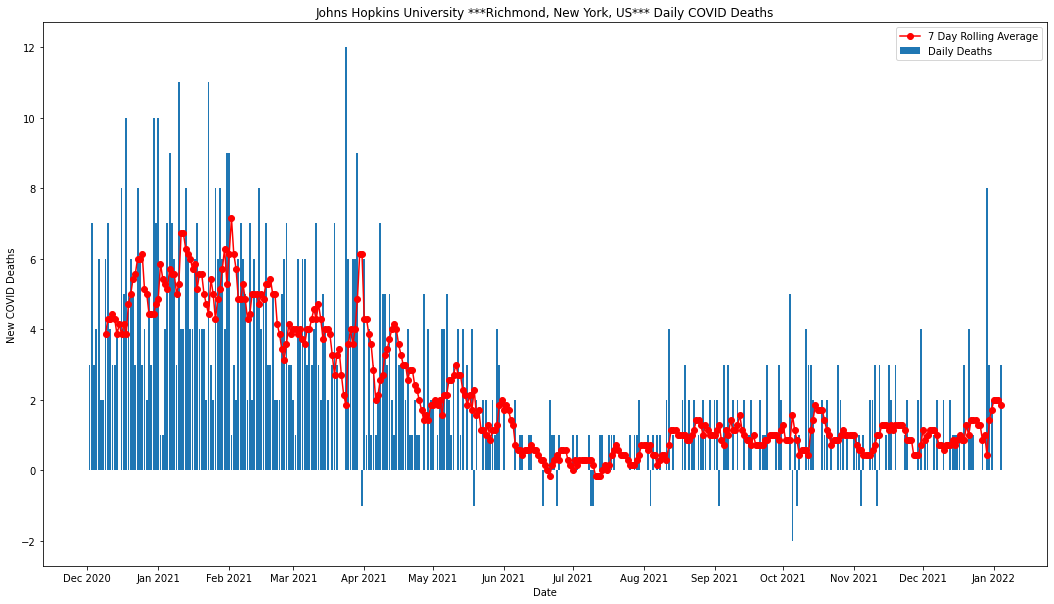

In [17]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_deaths(short_dict, short_keys, comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])

In [ ]:
for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Texas, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_deaths(df_jhu_total_dict, date_list, comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])

Bexar, Texas, US
Bexar, Texas, US
Dallas, Texas, US
Dallas, Texas, US
Harris, Texas, US
Harris, Texas, US
Travis, Texas, US
Travis, Texas, US


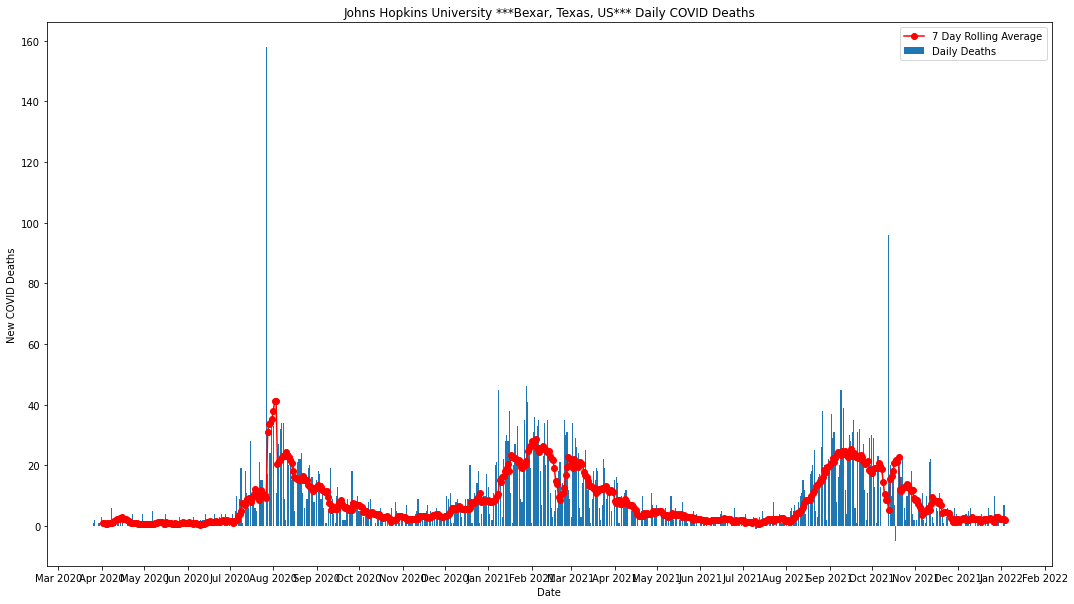

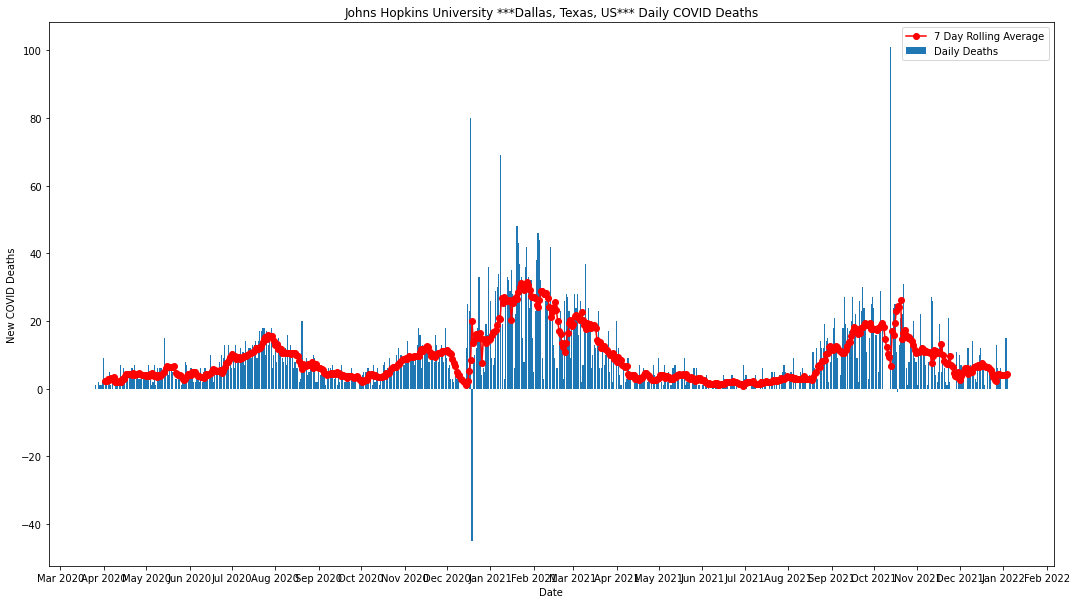

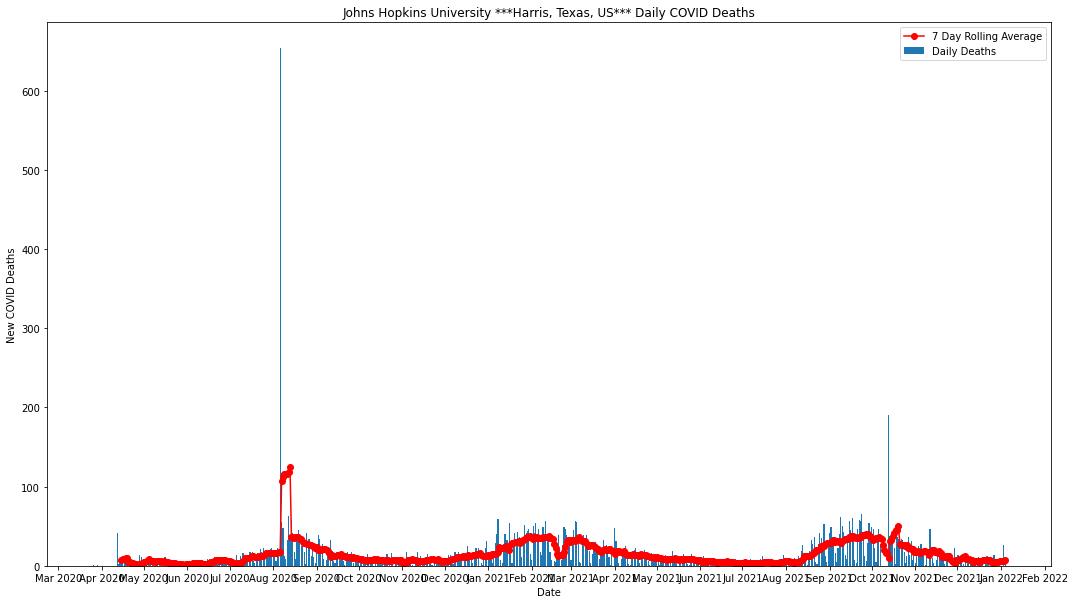

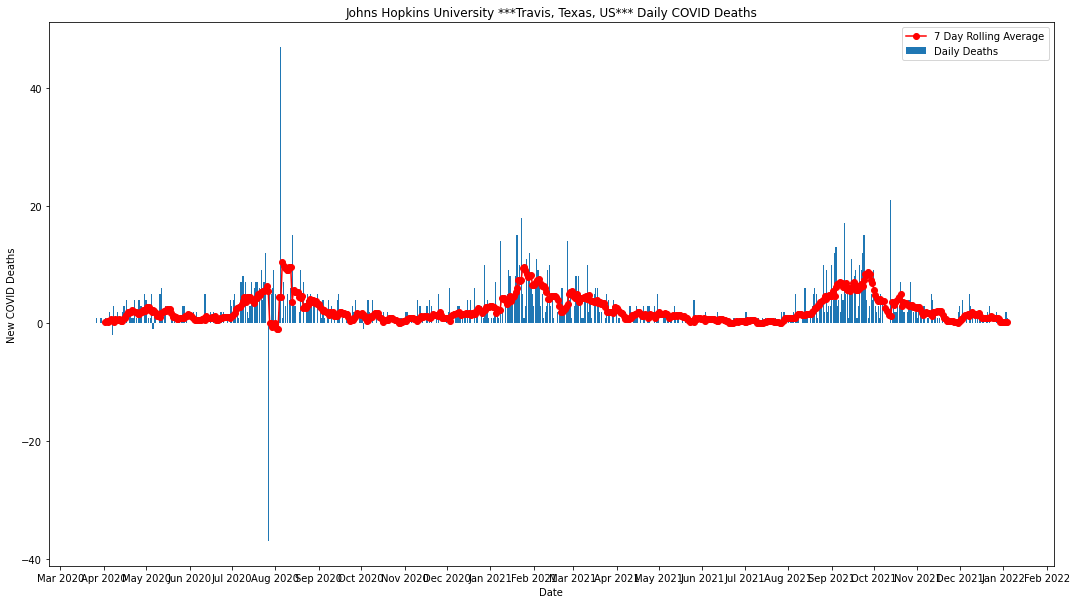

In [18]:
shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_deaths(df_jhu_total_dict, date_list, comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])

In [ ]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_deaths(short_dict, short_keys, comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])

In [19]:
def process_combined_key_fatality_ratio(passed_dict, passed_keys, passed_combined_key):
    print(passed_combined_key)
    aaa = pd.DataFrame()
#    aaa = passed_dict[passed_keys[0]].loc[passed_dict[passed_keys[0]].Combined_Key == passed_combined_key]
#    print(aaa)
    for d_value in passed_keys:
        aaa = aaa.append(passed_dict[d_value].loc[passed_dict[d_value].Combined_Key == passed_combined_key])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Case_Fatality_Ratio']]
    ccc = bbb.set_index('dt_date')
#    ddd = ccc.diff(periods = 1)
    ccc_7day_moving = ccc.rolling(7).mean().shift()
    return(ccc,passed_combined_key,ccc_7day_moving)

In [20]:
def chart_daily_fatality_ratio(passed_df, passed_combined_key, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_combined_key + '*** Daily COVID Cases')
    plt.xlabel('Date',color='black')
    plt.ylabel('Case Fatality Ratio',color='black')
    plt.bar(passed_df.index,passed_df.Case_Fatality_Ratio)
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Case Fatality Ratio'])
    fig.savefig('JHUDaily '+ passed_combined_key + ' New.png')

In [ ]:
for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Texas, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_case_fatality_ratio(short_dict,short_keys, comkey)
    chart_daily_case_fatality_ratio(xxx[0], xxx[1], xxx[2])

In [21]:
def process_combined_key_incident_rate(passed_dict, passed_keys, passed_combined_key):
    print(passed_combined_key)
    aaa = pd.DataFrame()
#    aaa = passed_dict[passed_keys[0]].loc[passed_dict[passed_keys[0]].Combined_Key == passed_combined_key]
#    print(aaa)
    for d_value in passed_keys:
        aaa = aaa.append(passed_dict[d_value].loc[passed_dict[d_value].Combined_Key == passed_combined_key])
#    return(xxx)
    bbb = aaa.loc[:,['dt_date','Incident_Rate']]
    ccc = bbb.set_index('dt_date')
 #  ddd = ccc.diff(periods = 1)
    ccc_7day_moving = ccc.rolling(7).mean().shift()
    return(ccc,passed_combined_key,ccc_7day_moving)

In [22]:
def chart_daily_incident_rate(passed_df, passed_combined_key, ddd_7day_moving):
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%b %Y')
    fig, ax = plt.subplots()
    fig.set_size_inches(18,10)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
    plt.title('Johns Hopkins University ***' + passed_combined_key + '*** Daily COVID Cases')
    plt.xlabel('Date',color='black')
    plt.ylabel('Incident Rate',color='black')
    plt.bar(passed_df.index,passed_df.Incident_Rate)
    plt.plot(ddd_7day_moving,'ro-')
    plt.legend(['7 Day Rolling Average','Daily Incident Rate'])
    fig.savefig('JHUDaily '+ passed_combined_key + ' New.png')

Bronx, New York, US
Bronx, New York, US
Kings, New York, US
Kings, New York, US
New York, New York, US
New York, New York, US
Queens, New York, US
Queens, New York, US
Richmond, New York, US
Richmond, New York, US


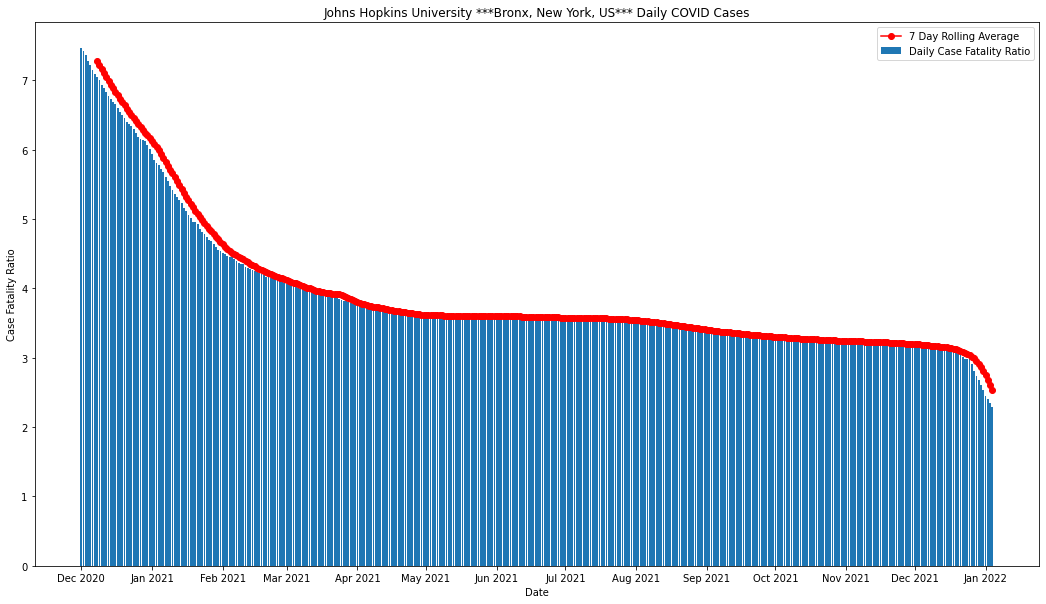

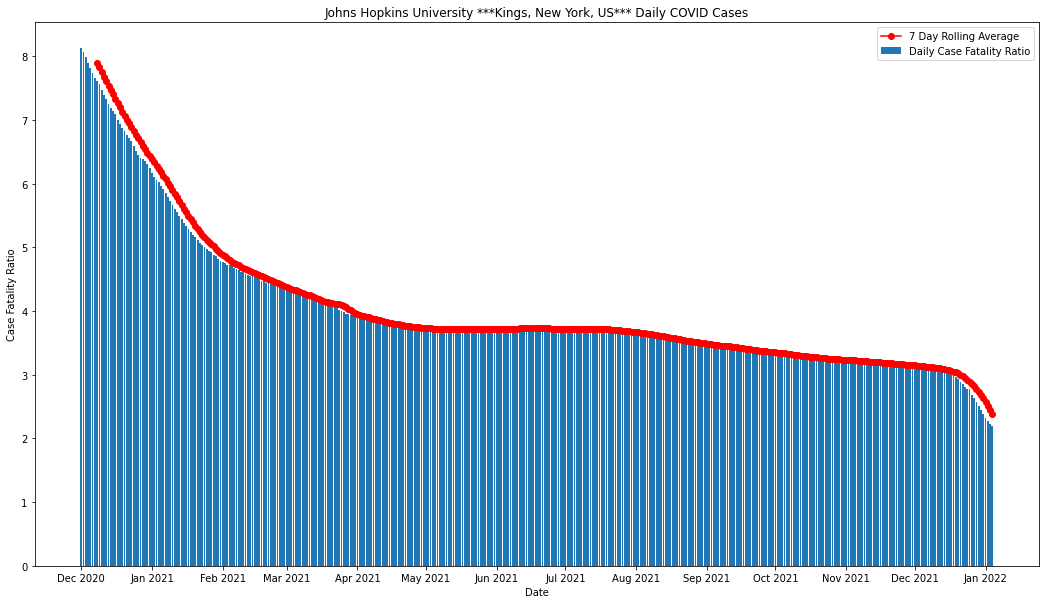

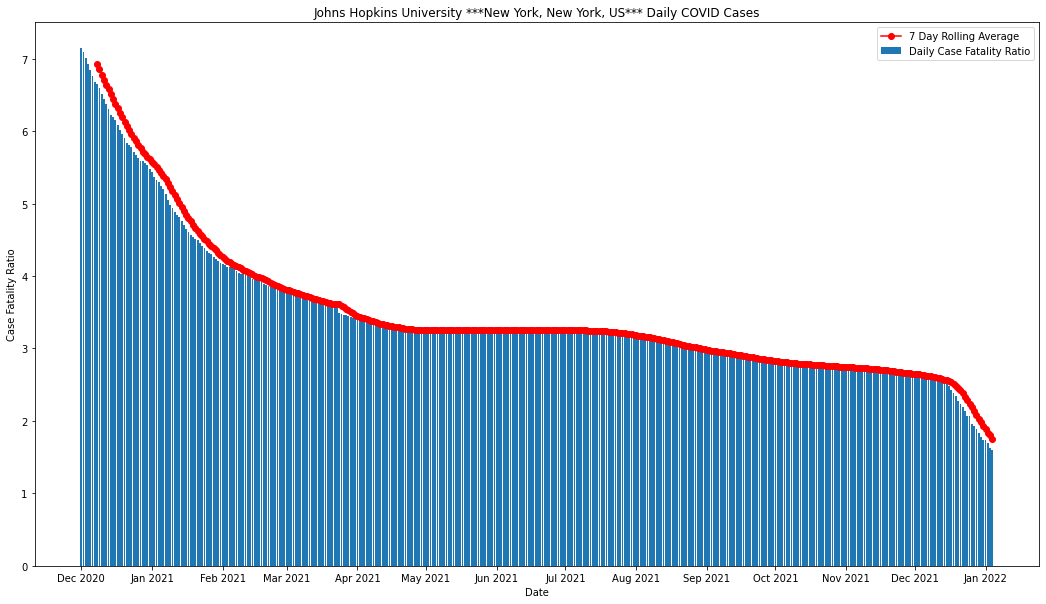

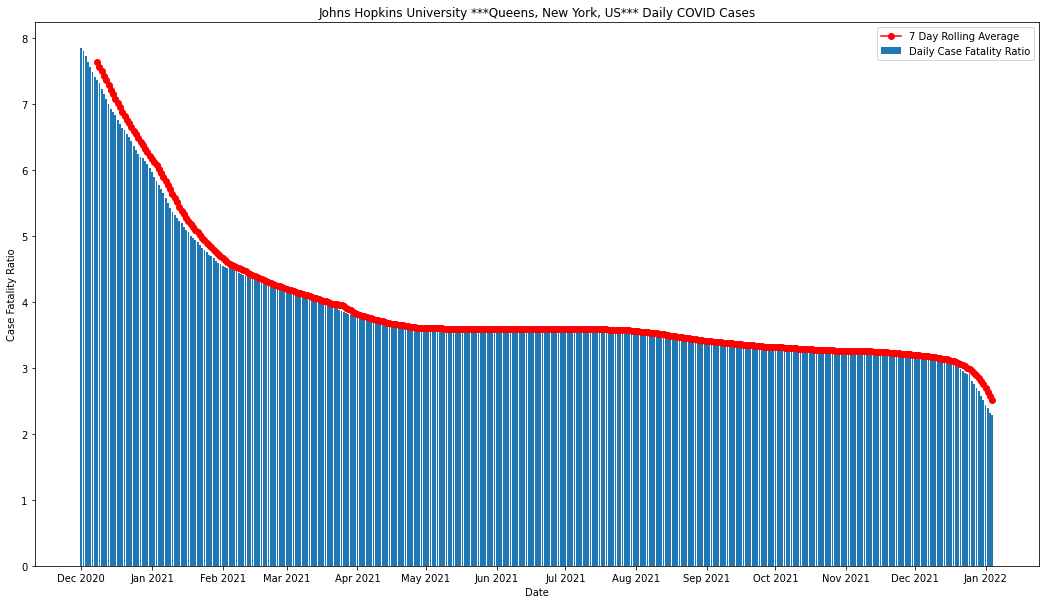

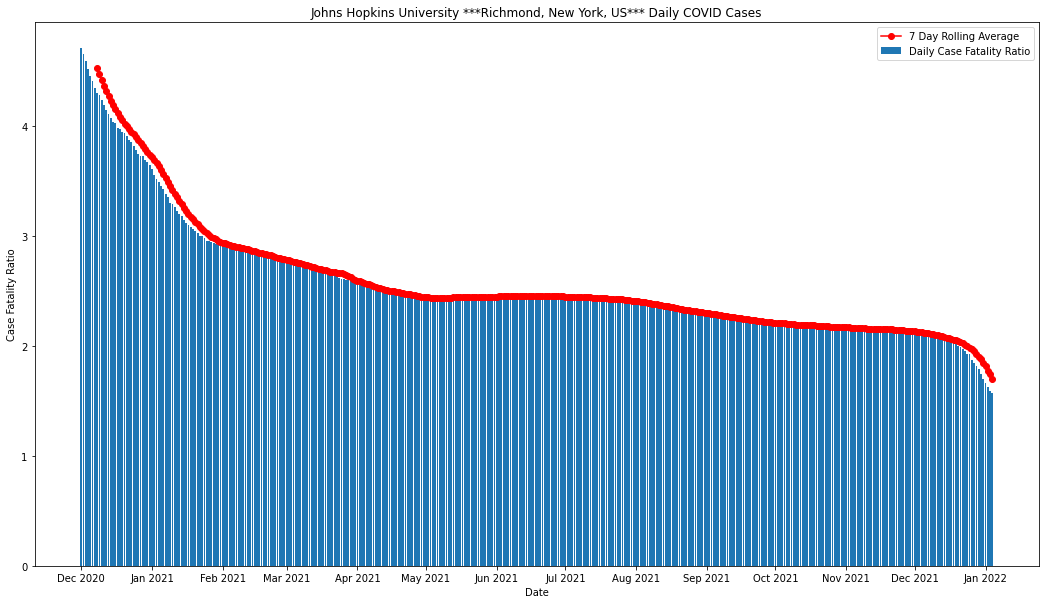

In [23]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_fatality_ratio(short_dict, short_keys, comkey)
    chart_daily_fatality_ratio(xxx[0], xxx[1], xxx[2])

In [ ]:
short_list = ['Bronx, New York, US', 'Kings, New York, US', 'New York, New York, US', 'Queens, New York, US', 'Richmond, New York, US']
for comkey in short_list:
    print(comkey)
    xxx = process_combined_key_incident_rate(short_dict, short_keys, comkey)
    chart_daily_incident_rate(xxx[0], xxx[1], xxx[2])

In [ ]:
for comkey in df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]].Combined_Key.str.contains(' Texas, US')].Combined_Key:
    print(comkey)
    xxx = process_combined_key_incident_rate(df_jhu_total_dict, date_list, comkey)
    chart_daily_incident_rate(xxx[0], xxx[1], xxx[2])

In [ ]:
shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_deaths(df_jhu_total_dict, date_list, comkey)
    chart_daily_deaths(xxx[0], xxx[1], xxx[2])

In [ ]:
shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_incident_rate(df_jhu_total_dict, date_list, comkey)
    chart_daily_incident_rate(xxx[0], xxx[1], xxx[2])

Bexar, Texas, US
Bexar, Texas, US
Dallas, Texas, US
Dallas, Texas, US
Harris, Texas, US
Harris, Texas, US
Travis, Texas, US
Travis, Texas, US


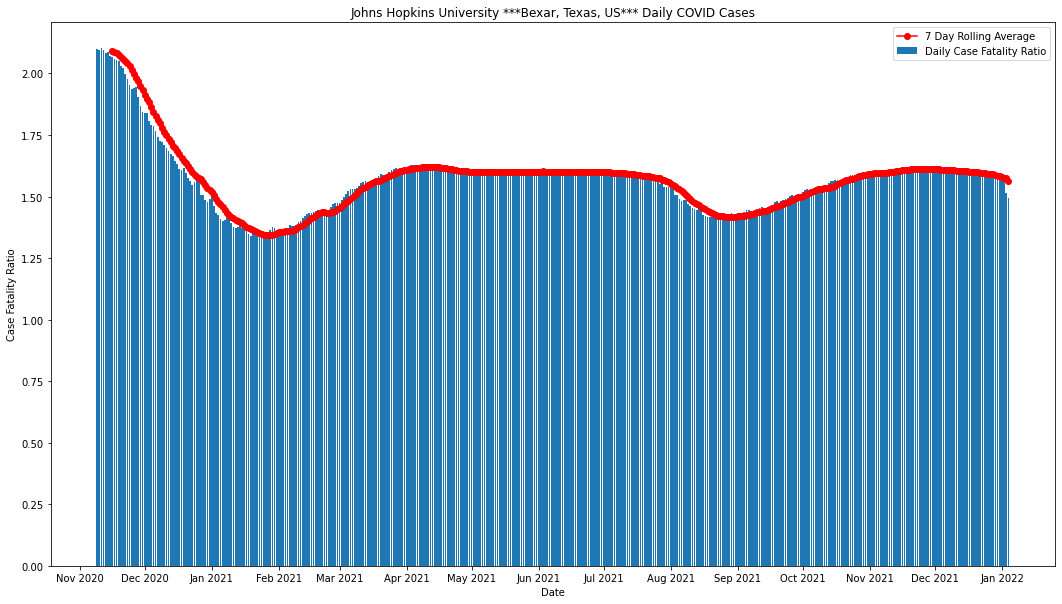

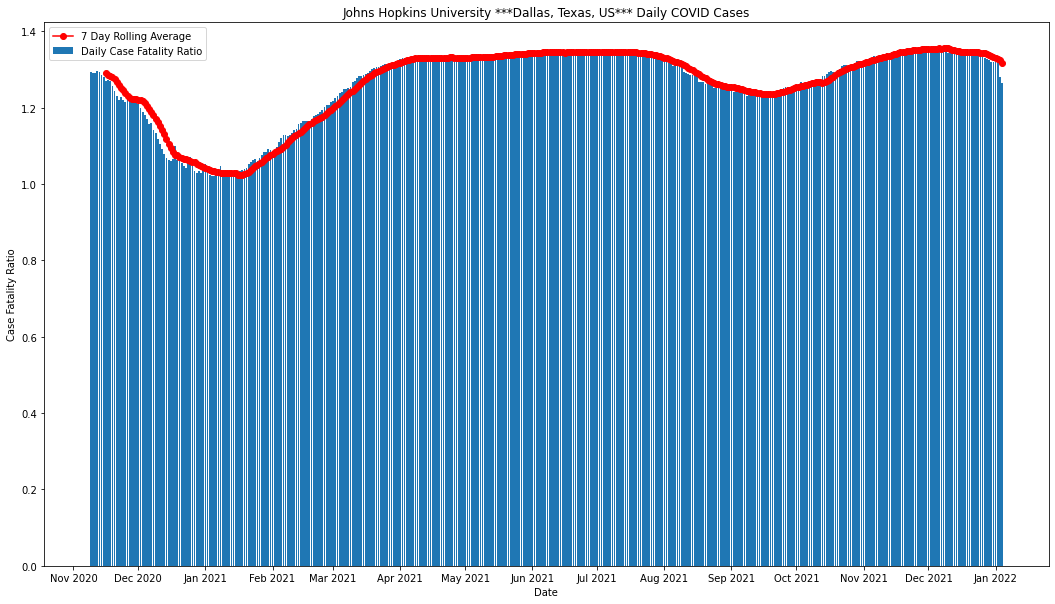

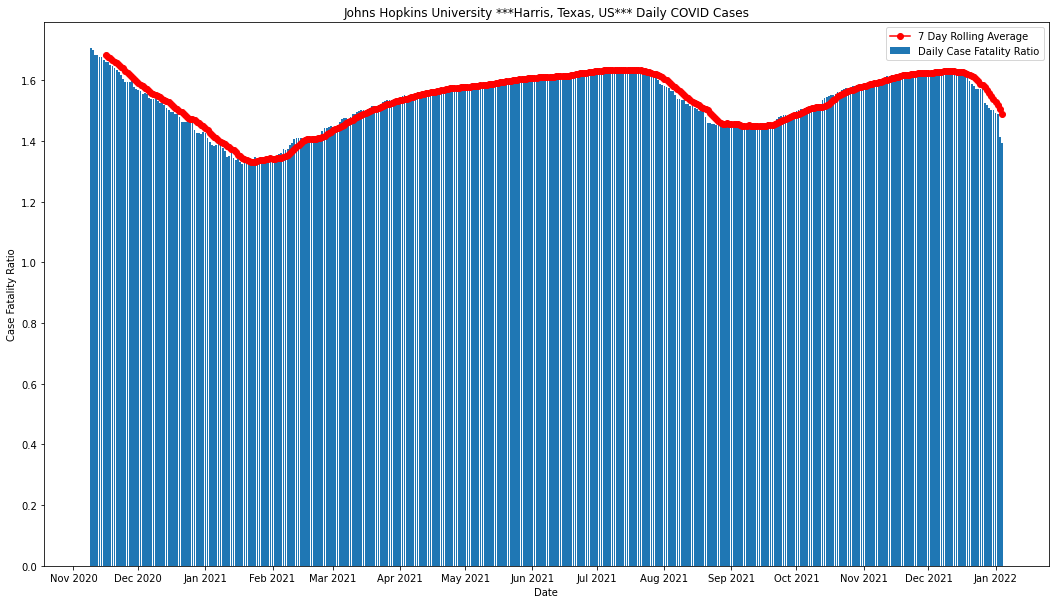

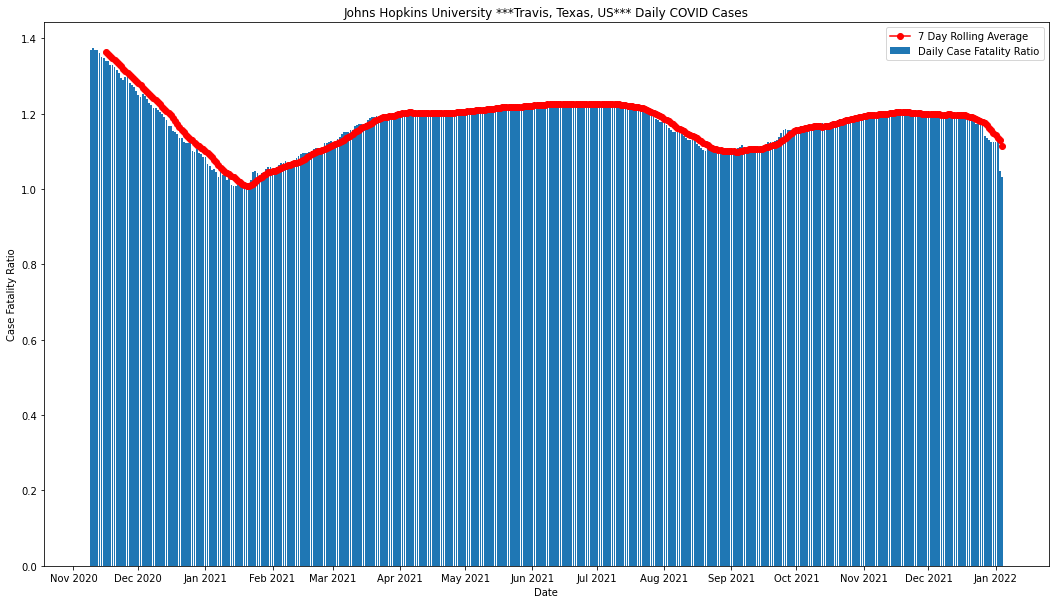

In [24]:
shortlist = ['Bexar, Texas, US', 'Dallas, Texas, US', 'Harris, Texas, US', 'Travis, Texas, US']
for comkey in shortlist:
    print(comkey)
    xxx = process_combined_key_fatality_ratio(df_jhu_total_dict, date_list, comkey)
    chart_daily_fatality_ratio(xxx[0], xxx[1], xxx[2])

In [40]:
df_jhu_total_dict[date_list[-1]][df_jhu_total_dict[date_list[-1]]['Country_Region'] =='US'][['Confirmed']].sum()

Confirmed    57058734
dtype: int64

In [35]:
df_jhu_total_dict[date_list[-2]][df_jhu_total_dict[date_list[-2]]['Country_Region'] =='US'][['Confirmed']].sum()

Confirmed    56189547
dtype: int64

In [36]:
57058734 - 56189547

869187

In [44]:
for x in range(10,1,-1):
    print(x)
    print(df_jhu_total_dict[date_list[-x + 1 ]][df_jhu_total_dict[date_list[-x + 1]]['Country_Region'] =='US'][['Confirmed']].sum() - df_jhu_total_dict[date_list[-x]][df_jhu_total_dict[date_list[-x]]['Country_Region'] =='US'][['Confirmed']].sum())

10
Confirmed    544329
dtype: int64
9
Confirmed    354683
dtype: int64
8
Confirmed    497002
dtype: int64
7
Confirmed    590547
dtype: int64
6
Confirmed    472515
dtype: int64
5
Confirmed    116442
dtype: int64
4
Confirmed    248174
dtype: int64
3
Confirmed    1082549
dtype: int64
2
Confirmed    869187
dtype: int64
